## topico 1

Isso é composto por

1. xxfsfs
2. dsdnsjdns

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = cancer['data']
y = cancer['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)


# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

'''
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
'''

predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
class Neural_Network(object):
  def __init__(self, layers):
  #parameters
    self.inputSize = layers[0]
    self.hiddenSize = layers[1]
    self.outputSize = layers[2]

  #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propagate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

  def train(self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)

  def saveWeights(self):
    np.savetxt("w1.txt", self.W1, fmt="%s")
    np.savetxt("w2.txt", self.W2, fmt="%s")

  def predict(self, value):
    print("Predicted data based on trained weights: ")
    print("Input (scaled): \n" + str(value))
    print("Output: \n" + str(self.forward(value)))

In [3]:
# X = (hours studying, hours sleeping), y = score on test
xAll = np.array(([2, 9, 7], [1, 5, 8], [3, 6, 9], [5, 10, 15]), dtype=float) # input data
y = np.array(([5], [10], [15]), dtype=float) # output

In [4]:
# scale units
xAll = xAll/np.amax(xAll, axis=0) # scaling input data
y = y/100 # scaling output data (max test score is 100)

# split data
X = np.split(xAll, [3])[0] # training data
xPredicted = np.split(xAll, [3])[1] # testing data

In [5]:
np.split(xAll, [3])

[array([[0.4       , 0.9       , 0.46666667],
        [0.2       , 0.5       , 0.53333333],
        [0.6       , 0.6       , 0.6       ]]),
 array([[1., 1., 1.]])]

<Figure size 432x288 with 0 Axes>

# 49

Input (scaled): 
[[0.4        0.9        0.46666667]
 [0.2        0.5        0.53333333]
 [0.6        0.6        0.6       ]]
Actual Output: 
[[0.05]
 [0.1 ]
 [0.15]]
Predicted Output: 
[[0.09454569]
 [0.09646814]
 [0.12311099]]
Loss: 
0.0009066037906652374




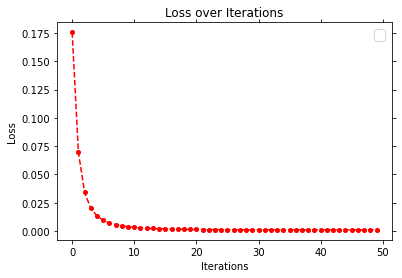

In [6]:
from IPython import display

x_vec = [] # array to store iteration count
y_data = [] # array to store loss values
plt.show()
NN = Neural_Network([3,10,1])


for i in range(50): # trains the NN 1,000 times
  display.clear_output(wait=True)
  display.display(plt.gcf())
    
  print("# " + str(i) + "\n")
  print("Input (scaled): \n" + str(X))
  print("Actual Output: \n" + str(y))
  print("Predicted Output: \n" + str(NN.forward(X)))
  loss = str(np.mean(np.square(y - NN.forward(X))))
  accuracy = 100 - float(loss)
  print("Loss: \n" +  loss ) # mean sum squared loss
  print("\n")
  
  x_vec.append(i)
  y_data.append(np.round(float(loss), 6))
  plt.cla()
  plt.title("Loss over Iterations")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend(['Erro'], fontsize=14)
  plt.plot(x_vec, y_data, linestyle='--', marker='o', color = 'red', markersize = 4)
  plt.pause(.001)
  NN.train(X, y)

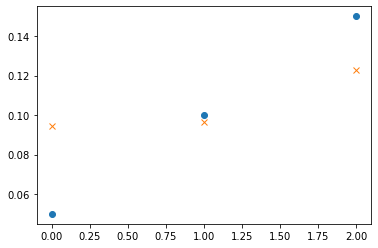

In [7]:
plt.figure()
plt.plot(y, 'o')
plt.plot(NN.forward(X), 'x')

In [ ]:
NN.saveWeights()
NN.predict(xPredicted)